# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

# Let's start working with the dataset a little bit.

In [2]:
# Start your codes here!
# Let us first import some libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import path
from PIL import Image


%matplotlib inline

In [3]:
# Read the data
winners = pd.read_csv("C:/Users/ASUS/Desktop/Giang/DevC_Challenge/Week 4/winners.csv")
players = pd.read_csv("C:/Users/ASUS/Desktop/Giang/DevC_Challenge/Week 4/players.csv")
matches = pd.read_csv("C:/Users/ASUS/Desktop/Giang/DevC_Challenge/Week 4/matches.csv")

In [4]:
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [5]:
players.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [6]:
matches.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


# Preprocess the data so that we will be easier to work with them

First let us have a quick looking through each of the dataset to see if something need to be done with each of them

1. Winners:

As we can see in the winners table, nothing much needs to be preprocessed, there is no null value, the only thing that poses problem is the column of Attendance. It is currently in the shape of string A.B. So as a result, let's fix this

In [7]:
winners = winners.dropna()

In [8]:
winners['Attendance'] = winners['Attendance'].str.replace('.','').astype('int64')



In [9]:
winners.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607



Also Germany FR needs to be changed to Germany

In [10]:
winners = winners.replace('Germany FR', 'Germany')

In [11]:
winners.head(20)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753


In [13]:
winners.to_csv(r'C:/Users/ASUS/Desktop/Giang/DevC_Challenge/Week 4/Homework_cleaned_data/winners_cleaned.csv',index=False)

2. Matches:

First let's drop any rows with null value. Probably none of them. NOte that the win conditions will not be affected because the nothing places are actually string with zero characters.

In [14]:
matches = matches.dropna()

In [15]:
matches.shape

(850, 20)

In [16]:
matches = matches.replace('Germany FR', 'Germany')

In [17]:
matches['Year'] = matches['Year'].astype('int64')

In [18]:
matches.to_csv(r'C:/Users/ASUS/Desktop/Giang/DevC_Challenge/Week 4/Homework_cleaned_data/matches_cleaned.csv',index=False)

3. players

We see that players with no EVENTS are of no use for data analysis. So we will consider delete them.

In [19]:
players = players.dropna(subset=['Event'])

In [20]:
players.head(30)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
14,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Lucien LAURENT,NaN,G19'
35,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
41,201,1090,USA,MILLAR Bob (USA),S,0,Bart McGHEE,NaN,G23'
45,201,1090,USA,MILLAR Bob (USA),S,0,Bert PATENAUDE,NaN,G69'
73,201,1093,YUG,SIMONOVIC Bosko (YUG),S,0,Ivica BEK,NaN,G30'
74,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'
81,201,1093,YUG,SIMONOVIC Bosko (YUG),S,0,Aleksandar TIRNANIC,NaN,G21'


In [21]:
players.to_csv(r'C:/Users/ASUS/Desktop/Giang/DevC_Challenge/Week 4/Homework_cleaned_data/players_cleaned.csv',index=False)

# Now it's time to look at the data and find the answer to some of our questions.

# Winners data exploration.

***Question 1: What is the number of gold, silver and bronze sorted by country.***

In [18]:
gold = winners['Winner']
silver = winners['Runners-Up']
bronze1 = winners['Third']
bronze2 = winners['Fourth']

In [19]:
gold_count = pd.DataFrame.from_dict(gold.value_counts())
silver_count = pd.DataFrame.from_dict(silver.value_counts())
bronze1_count = pd.DataFrame.from_dict(bronze1.value_counts())
bronze2_count = pd.DataFrame.from_dict(bronze2.value_counts())

In [20]:
gold_count.head()

,Winner
Brazil,5
Italy,4
Germany,4
Uruguay,2
Argentina,2


In [21]:
silver_count.head()

,Runners-Up
Germany,4
Netherlands,3
Argentina,3
Hungary,2
Czechoslovakia,2


In [22]:
bronze1_count.head()

,Third
Germany,4
Sweden,2
Brazil,2
Poland,2
France,2


In [23]:
bronze2_count.head()

,Fourth
Uruguay,3
Brazil,2
Yugoslavia,2
Korea Republic,1
Sweden,1


In [24]:
podium_count = gold_count.join(silver_count, how = 'outer').join(bronze1_count,how='outer').join(bronze2_count,how='outer')

In [25]:
podium_count = podium_count.fillna(0)

In [26]:
podium_count = podium_count.astype('int64')


In [27]:
podium_count = podium_count.sort_values(by=['Winner','Runners-Up','Third','Fourth'], ascending = False)

Text(0, 0.5, 'Number Of Podium')

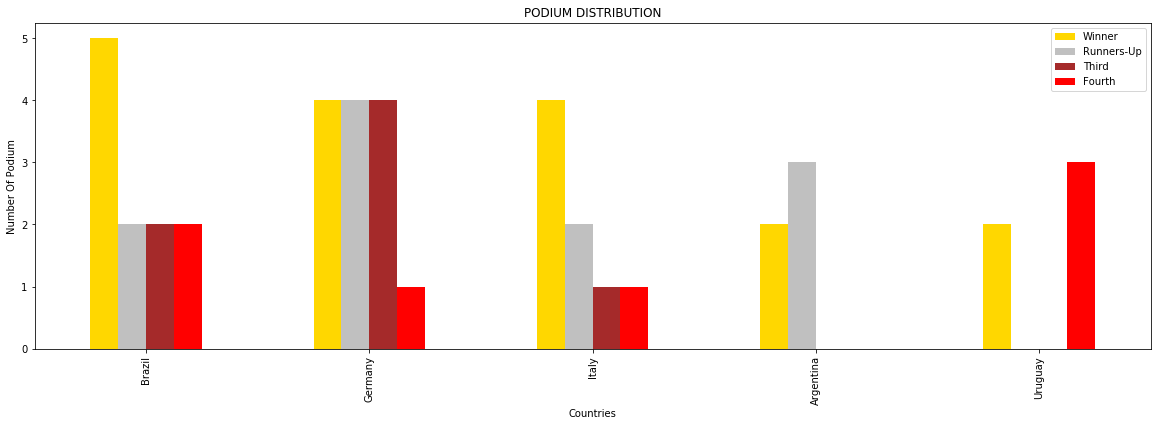

In [28]:
podium_count[:5].plot(y = ['Winner','Runners-Up','Third','Fourth'], kind='bar', color=['gold','silver','brown', 'red'], figsize=(20,6))
plt.title("PODIUM DISTRIBUTION")
plt.xlabel("Countries")
plt.ylabel("Number Of Podium")

***Question 2: Goal Score each World Cup Season Of all the teams***

In [29]:
goal_each_year = winners.loc[:,['Year','GoalsScored']]
goal_each_year['GoalsScored'] = goal_each_year['GoalsScored'].astype('int64')
goal_each_year.head(2)

,Year,GoalsScored
0,1930,70
1,1934,70


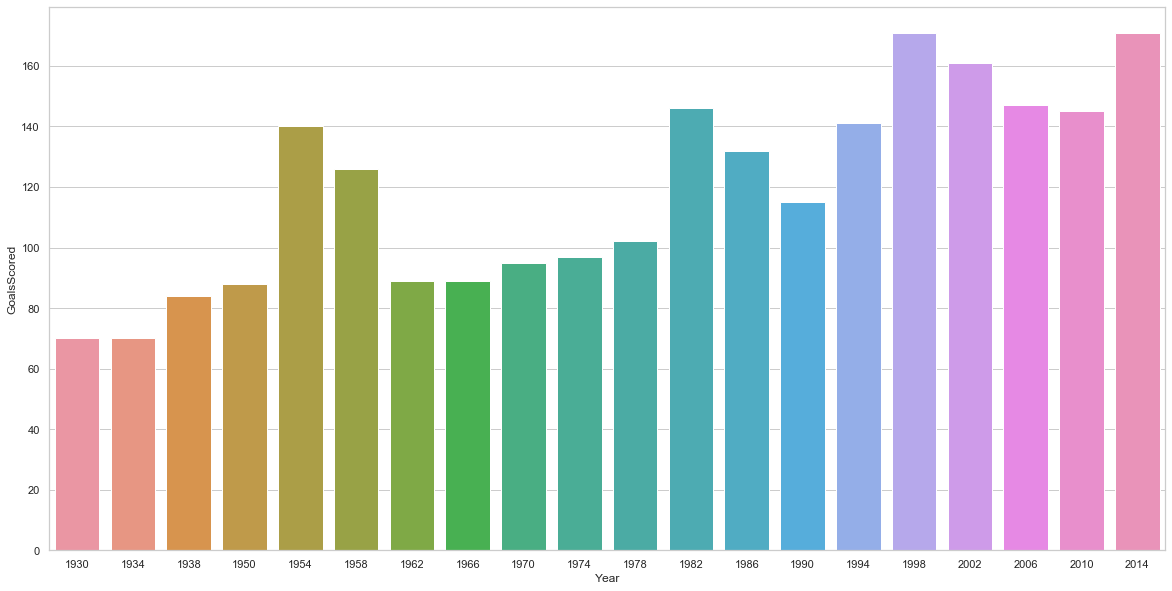

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
ax = sns.barplot(x="Year", y="GoalsScored", data=goal_each_year)


***Questions 3: Attendance, number of teams, goals and matchs per cup?***

Text(0.5, 1.0, 'Number of Matches Per Season')

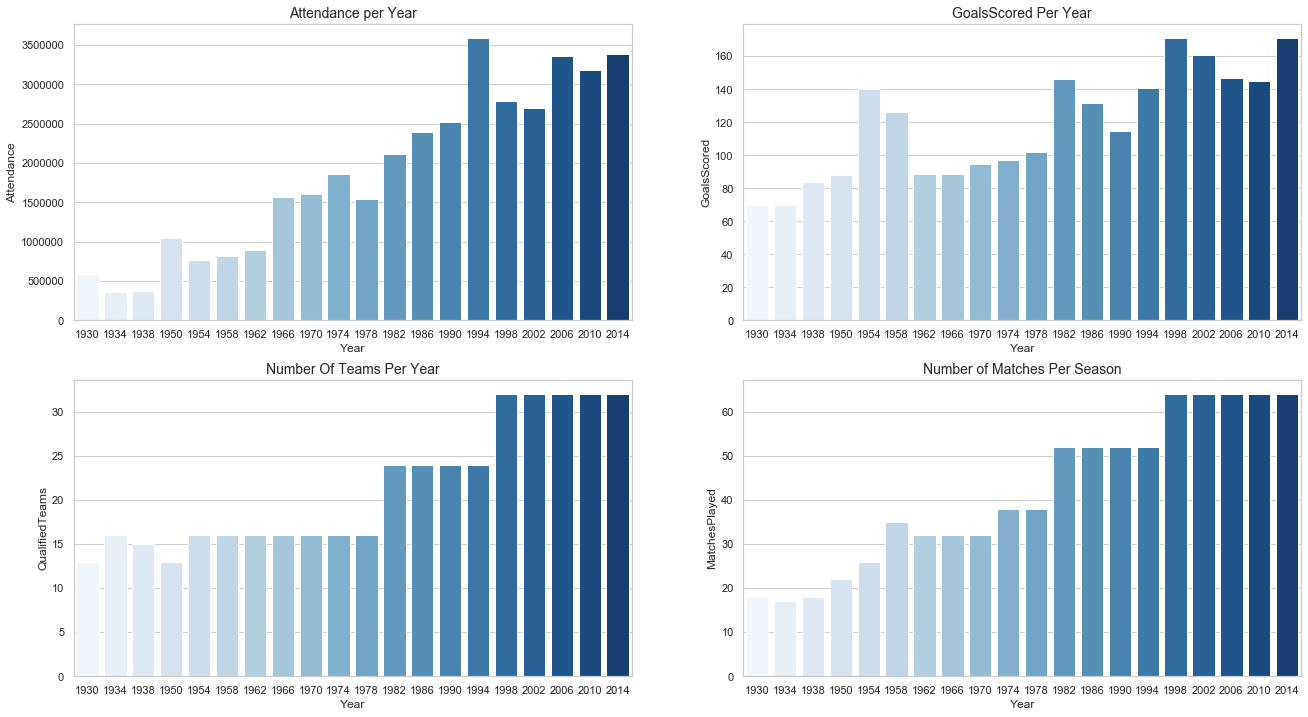

In [31]:
plt.figure(figsize = (22,12))
sns.set_style("whitegrid")
plt.subplot(221)
g1 = sns.barplot(x="Year", y="Attendance", data = winners, palette = "Blues")
g1.set_title("Attendance per Year", fontsize = 14)

plt.subplot(222)
g2 = sns.barplot(x = "Year", y = "GoalsScored", data = winners, palette = "Blues")
g2.set_title("GoalsScored Per Year", fontsize = 14)

plt.subplot(223)
g3 = sns.barplot(x = "Year", y = "QualifiedTeams", data = winners, palette = "Blues")
g3.set_title("Number Of Teams Per Year", fontsize = 14)

plt.subplot(224)
g4 = sns.barplot(x = "Year", y = "MatchesPlayed", data = winners, palette = "Blues")
g4.set_title("Number of Matches Per Season", fontsize = 14)



***2. Matches***

***Question 1: How many goals have been scored by each team?***

In [32]:
home = matches[['Home Team Name', 'Home Team Goals']].dropna()
away = matches[['Away Team Name', 'Away Team Goals']].dropna()

In [33]:
home = home.groupby(['Home Team Name']).sum()
away = away.groupby(['Away Team Name']).sum()

In [34]:
total_goal = home.join(away, how='outer').fillna(0)

In [35]:
total_goal = total_goal.astype('int64')

Text(0, 0.5, 'Goals')

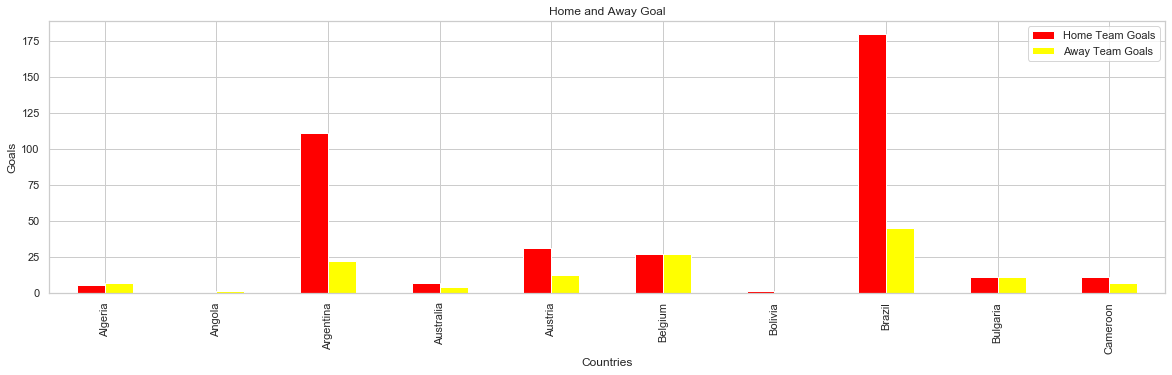

In [36]:
total_goal[:10].plot(y = ['Home Team Goals', 'Away Team Goals'], kind = 'bar', color=['red','yellow'], figsize = (20,5))
plt.title("Home and Away Goal")
plt.xlabel("Countries")
plt.ylabel("Goals")

In [37]:
total_goal['Total Goals'] = total_goal['Home Team Goals'] + total_goal['Away Team Goals']

Text(0, 0.5, 'Number of Goals')

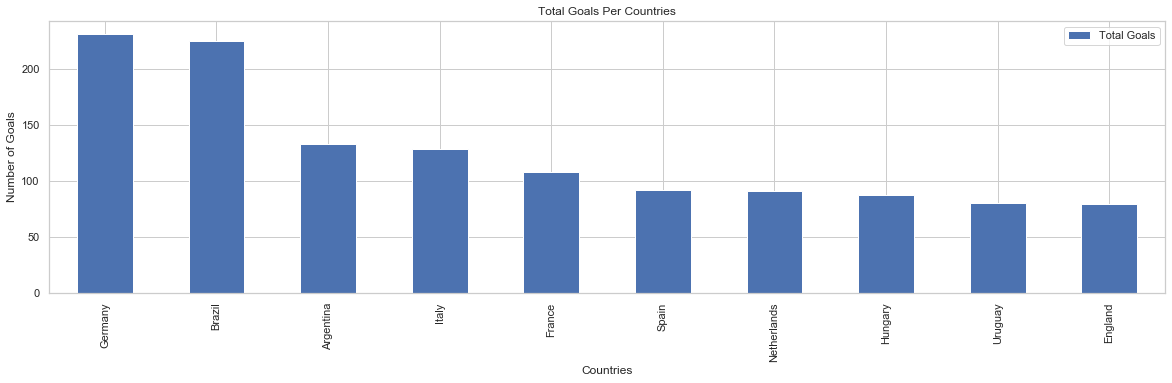

In [38]:
total_goal = total_goal.sort_values(by = 'Total Goals', ascending = False)
total_goal[:10].plot(y= 'Total Goals', kind = 'bar', figsize = (20,5))
plt.title("Total Goals Per Countries")
plt.xlabel("Countries")
plt.ylabel("Number of Goals")

***Question 2: How many decisive games (winning or losing are decided in main time)***

In [39]:
winner_by_score_home = matches['Home Team Goals'] > matches['Away Team Goals']
winner_by_score_away = matches['Away Team Goals'] > matches['Home Team Goals']

winner_by_score = winner_by_score_home | winner_by_score_away

In [40]:
# winner_by_score

In [41]:
matches['Winner By Score'] = winner_by_score

In [42]:
filter1 = matches['Winner By Score'] == True

In [43]:
decisive_matches = matches[['Year','Winner By Score']].loc[filter1]['Year']
decisive_matches.head()

0    1930
1    1930
2    1930
3    1930
4    1930
Name: Year, dtype: int64

In [44]:
decisive_matches = decisive_matches.astype('int64')

In [45]:
decisive_matches

0      1930
1      1930
2      1930
3      1930
4      1930
       ... 
845    2014
846    2014
848    2014
850    2014
851    2014
Name: Year, Length: 660, dtype: int64

In [46]:
decisive_matches = pd.DataFrame.from_dict(decisive_matches.value_counts())
decisive_matches

,Year
2014,61
2006,49
2010,48
2002,48
1998,45
1994,41
1990,40
1986,38
1982,35
1978,29


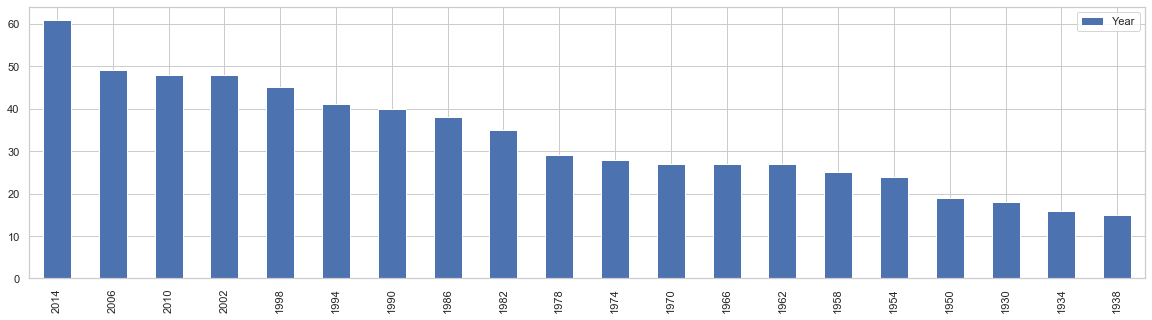

In [47]:

decisive_matches.plot(y = 'Year', figsize = (20,5), kind = 'bar')

***3. Players***

We are going to pick top players with the most scores

In [101]:
players['number Of Goals'] = players['Event'].str.count('G')

In [102]:
player_and_goal = players[['Player Name', 'number Of Goals']].fillna(0)

In [103]:
player_and_goal['number Of Goals'] = player_and_goal['number Of Goals'].astype('int64')

In [104]:
player_and_goal = player_and_goal.groupby(['Player Name'], as_index = True).sum()
player_and_goal = player_and_goal.sort_values(by = 'number Of Goals', ascending = False)

In [105]:
player_and_goal

,number Of Goals
Player Name,
KLOSE,17
RONALDO,16
Just FONTAINE,13
Gerd MUELLER,13
PEL� (Edson Arantes do Nascimento),12
...,...
Horst SZYMANIAK,0
Horst-Dieter HOETTGES,0
Hristo STOICHKOV,0


In [106]:
top5 = player_and_goal[:5]
top5

,number Of Goals
Player Name,
KLOSE,17
RONALDO,16
Just FONTAINE,13
Gerd MUELLER,13
PEL� (Edson Arantes do Nascimento),12


D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 65533 missing from current font.
  font.set_text(s, 0, flags=flags)


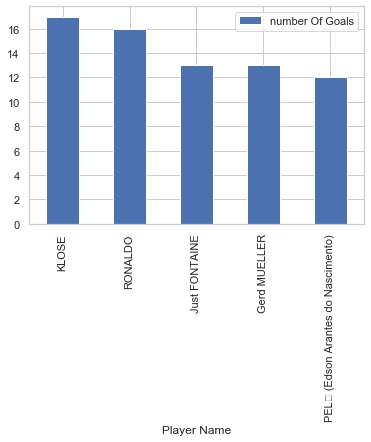

In [107]:
top5.plot(kind='bar')

# REPORT ON GOOGLE DATA STUDIO

[Link](https://bit.ly/310eLZh)